In [21]:
from tda import auth, client
import json
import pandas as pd
from datetime import timezone
import datetime
import time
import numpy as np

from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, NumeralTickFormatter
from bokeh.models import Range1d, HoverTool
from bokeh.models import LinearAxis, WheelZoomTool, DataRange1d
from math import pi
from bokeh.layouts import gridplot
from bokeh.palettes import d3

In [22]:

token_path = 'token.json'
api_key = 'AMATUSEVSKI3@AMER.OAUTHAP'
redirect_uri = 'http://127.0.0.1:5000/key'
try:
    c = auth.client_from_token_file(token_path, api_key)
except FileNotFoundError:
    from selenium import webdriver
    with webdriver.Chrome() as driver:
        c = auth.client_from_login_flow(
            driver, api_key, redirect_uri, token_path)

r = c.get_price_history('AAPL',
        period_type=client.Client.PriceHistory.PeriodType.YEAR,
        period=client.Client.PriceHistory.Period.TWENTY_YEARS,
        frequency_type=client.Client.PriceHistory.FrequencyType.DAILY,
        frequency=client.Client.PriceHistory.Frequency.DAILY)
assert r.status_code == 200, r.raise_for_status()
print(json.dumps(r.json(), indent=4))

{
    "candles": [
        {
            "open": 0.244821425,
            "high": 0.245535725,
            "low": 0.241071425,
            "close": 0.2425,
            "volume": 502958400,
            "datetime": 1050296400000
        },
        {
            "open": 0.242678575,
            "high": 0.24285715,
            "low": 0.2375,
            "close": 0.23910715,
            "volume": 303968000,
            "datetime": 1050382800000
        },
        {
            "open": 0.231964275,
            "high": 0.24410715,
            "low": 0.230714275,
            "close": 0.236428575,
            "volume": 1016176000,
            "datetime": 1050469200000
        },
        {
            "open": 0.235714275,
            "high": 0.23660715,
            "low": 0.22714285,
            "close": 0.234285725,
            "volume": 616257600,
            "datetime": 1050555600000
        },
        {
            "open": 0.234464275,
            "high": 0.235535725,
            "low": 0.23

In [23]:
o = r.json()

In [24]:
r = c.get_price_history('AAPL',
        period_type=client.Client.PriceHistory.PeriodType.YEAR,
        period=client.Client.PriceHistory.Period.TWENTY_YEARS,
        frequency_type=client.Client.PriceHistory.FrequencyType.DAILY,
        frequency=client.Client.PriceHistory.Frequency.DAILY)
assert r.status_code == 200, r.raise_for_status()
# print(json.dumps(r.json(), indent=4))

In [25]:
r = c.get_price_history('AAPL',
        period_type=client.Client.PriceHistory.PeriodType.DAY,
        period=client.Client.PriceHistory.Period.TEN_DAYS,
        frequency_type=client.Client.PriceHistory.FrequencyType.MINUTE,
        frequency=client.Client.PriceHistory.Frequency.EVERY_MINUTE)
assert r.status_code == 200, r.raise_for_status()


In [26]:
o = r.json()
print(len(o['candles']))
o

7098


{'candles': [{'open': 161.2,
   'high': 161.2,
   'low': 161.09,
   'close': 161.15,
   'volume': 4018,
   'datetime': 1680174000000},
  {'open': 161.15,
   'high': 161.15,
   'low': 161.15,
   'close': 161.15,
   'volume': 1652,
   'datetime': 1680174060000},
  {'open': 161.18,
   'high': 161.2,
   'low': 161.18,
   'close': 161.2,
   'volume': 1835,
   'datetime': 1680174120000},
  {'open': 161.27,
   'high': 161.29,
   'low': 161.26,
   'close': 161.29,
   'volume': 6691,
   'datetime': 1680174180000},
  {'open': 161.28,
   'high': 161.38,
   'low': 161.28,
   'close': 161.38,
   'volume': 11270,
   'datetime': 1680174240000},
  {'open': 161.37,
   'high': 161.39,
   'low': 161.35,
   'close': 161.39,
   'volume': 1169,
   'datetime': 1680174300000},
  {'open': 161.39,
   'high': 161.41,
   'low': 161.37,
   'close': 161.37,
   'volume': 1918,
   'datetime': 1680174360000},
  {'open': 161.41,
   'high': 161.41,
   'low': 161.37,
   'close': 161.4,
   'volume': 2425,
   'datetime': 1

In [27]:
df = pd.DataFrame(o['candles'])
df['datetime'] = list(map(datetime.datetime.fromtimestamp,df['datetime']/1000))
df

,open,high,low,close,volume,datetime
0,161.20,161.2000,161.09,161.15,4018,2023-03-30 07:00:00
1,161.15,161.1500,161.15,161.15,1652,2023-03-30 07:01:00
2,161.18,161.2000,161.18,161.20,1835,2023-03-30 07:02:00
3,161.27,161.2900,161.26,161.29,6691,2023-03-30 07:03:00
4,161.28,161.3800,161.28,161.38,11270,2023-03-30 07:04:00
...,...,...,...,...,...,...
7093,165.22,165.2501,165.22,165.25,2325,2023-04-13 19:55:00
7094,165.25,165.2900,165.25,165.29,1001,2023-04-13 19:56:00
7095,165.29,165.2900,165.25,165.25,522,2023-04-13 19:57:00
7096,165.28,165.2800,165.26,165.26,200,2023-04-13 19:58:00


In [28]:
candles = []

In [29]:
r = c.get_price_history('$NDX.X',
        period_type=client.Client.PriceHistory.PeriodType.DAY,
        period=client.Client.PriceHistory.Period.TEN_DAYS,
        frequency_type=client.Client.PriceHistory.FrequencyType.MINUTE,
        frequency=client.Client.PriceHistory.Frequency.EVERY_MINUTE)
assert r.status_code == 200, r.raise_for_status()

o = r.json()
print(len(o['candles']))
df = pd.DataFrame(o['candles'])
df['datetime'] = list(map(datetime.datetime.fromtimestamp,df['datetime']/1000))
df


4660


,open,high,low,close,volume,datetime
0,12934.9927,12939.1000,12930.7747,12930.7747,0,2023-03-30 09:30:00
1,12930.0955,12932.4596,12924.3781,12928.0427,0,2023-03-30 09:31:00
2,12929.9704,12952.8262,12929.9704,12950.4721,0,2023-03-30 09:32:00
3,12949.8722,12949.8722,12944.4791,12946.5453,0,2023-03-30 09:33:00
4,12946.6206,12947.6260,12938.2486,12941.9542,0,2023-03-30 09:34:00
...,...,...,...,...,...,...
4655,13109.3887,13109.3887,13109.3887,13109.3887,0,2023-04-13 17:11:00
4656,13109.3887,13109.3887,13109.3887,13109.3887,0,2023-04-13 17:12:00
4657,13109.3887,13109.3887,13109.3887,13109.3887,0,2023-04-13 17:13:00
4658,13109.3887,13109.3887,13109.3887,13109.3887,0,2023-04-13 17:14:00


In [30]:
candles += o['candles']

In [31]:
len(candles)

4660

In [32]:
o['candles'][0]['datetime']

1680183000000

In [33]:
def get_date(d):
    return datetime.datetime.fromtimestamp(d/1000)

In [34]:
get_date(o['candles'][0]['datetime']), get_date(o['candles'][-1]['datetime'])

(datetime.datetime(2023, 3, 30, 9, 30), datetime.datetime(2023, 4, 13, 17, 15))

In [35]:
candles = []
new_date = datetime.datetime.fromtimestamp(o['candles'][0]['datetime']/1000)
start_datetime =  new_date + datetime.timedelta(days=-10)
end_datetime =  new_date
for i  in range(10):
        r = c.get_price_history('$NDX.X',
                period_type=client.Client.PriceHistory.PeriodType.DAY,
                # period=client.Client.PriceHistory.Period.TEN_DAYS,
                frequency_type=client.Client.PriceHistory.FrequencyType.MINUTE,
                frequency=client.Client.PriceHistory.Frequency.EVERY_MINUTE,
                start_datetime=start_datetime,
                end_datetime=end_datetime)
        assert r.status_code == 200, r.raise_for_status()

        o = r.json()
        candles += o['candles']
        start_datetime = start_datetime + datetime.timedelta(days=-10)
        end_datetime = end_datetime + datetime.timedelta(days=-10)
        print(len(candles), start_datetime, end_datetime)


4194 2023-03-10 09:30:00 2023-03-20 09:30:00
7456 2023-02-28 09:30:00 2023-03-10 09:30:00
11650 2023-02-18 09:30:00 2023-02-28 09:30:00
12582 2023-02-08 09:30:00 2023-02-18 09:30:00
12582 2023-01-29 09:30:00 2023-02-08 09:30:00
12582 2023-01-19 09:30:00 2023-01-29 09:30:00
12582 2023-01-09 09:30:00 2023-01-19 09:30:00
12582 2022-12-30 09:30:00 2023-01-09 09:30:00
12582 2022-12-20 09:30:00 2022-12-30 09:30:00
12582 2022-12-10 09:30:00 2022-12-20 09:30:00


In [36]:
df.to_csv('../data/NDX.X.csv', index=False)

In [37]:
df = pd.read_csv('../data/NDX.X.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.head()

,open,high,low,close,volume,datetime
0,12934.9927,12939.1000,12930.7747,12930.7747,0,2023-03-30 09:30:00
1,12930.0955,12932.4596,12924.3781,12928.0427,0,2023-03-30 09:31:00
2,12929.9704,12952.8262,12929.9704,12950.4721,0,2023-03-30 09:32:00
3,12949.8722,12949.8722,12944.4791,12946.5453,0,2023-03-30 09:33:00
4,12946.6206,12947.6260,12938.2486,12941.9542,0,2023-03-30 09:34:00


In [38]:
def fisher_transform(close, period=9):
    # Calculate the midpoint price
    mp = (close + pd.Series.rolling(close, window=period).min() + pd.Series.rolling(close, window=period).max()) / 3
    
    # Calculate the difference between the midpoint price and the close price
    diff = close - mp
    
    # Calculate the maximum and minimum values over the period
    max_diff = pd.Series.rolling(diff.abs(), window=period).max()
    min_diff = pd.Series.rolling(diff.abs(), window=period).min()
    
    # Calculate the relative strength
    rs = (diff - min_diff) / (max_diff - min_diff)
    
    # Calculate the Fisher Transform
    fish = 0.5 * np.log((1 + rs) / (1 - rs))
    
    return fish

In [39]:
def fisher_transform(close, period=9):
    # Calculate the midpoint price
    mp = (close + pd.Series.rolling(close, window=period).min() + pd.Series.rolling(close, window=period).max()) / 3
    
    # Calculate the difference between the midpoint price and the close price
    diff = close - mp
    
    # Calculate the maximum and minimum values over the period
    max_diff = pd.Series.rolling(diff.abs(), window=period).max()
    min_diff = pd.Series.rolling(diff.abs(), window=period).min()
    
    # Calculate the relative strength
    rs = (diff - min_diff) / (max_diff - min_diff)
    
    # Calculate the Fisher Transform
    fish = 0.5 * np.log((1 + rs) / (1 - rs))
    
    return fish

In [40]:
nasdaq_data = df['close'].values

In [41]:
def fix_periods(df, col):
    df[col] = df[col].fillna(0)
    fisher_min = df[df[col]>-np.inf][col].min()
    fisher_max = df[df[col]<np.inf][col].max()
    df.loc[df[col] == np.inf,col]=fisher_max
    df.loc[df[col] == -np.inf,col]=fisher_min


In [42]:
periods = [9,20, 50]
for period in periods:
    col = f'fisher{period}'
    df[col] = fisher_transform(df['close'], period=period)
    fix_periods(df, col)
    df[col + 'ma2']=df[col].rolling(window=2).mean()

c:\Users\amatu\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\amatu\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\amatu\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\amatu\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\amatu\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, meth

In [43]:
df.head()

,open,high,low,close,volume,datetime,fisher9,fisher9ma2,fisher20,fisher20ma2,fisher50,fisher50ma2
0,12934.9927,12939.1000,12930.7747,12930.7747,0,2023-03-30 09:30:00,0.0,NaN,0.0,NaN,0.0,NaN
1,12930.0955,12932.4596,12924.3781,12928.0427,0,2023-03-30 09:31:00,0.0,0.0,0.0,0.0,0.0,0.0
2,12929.9704,12952.8262,12929.9704,12950.4721,0,2023-03-30 09:32:00,0.0,0.0,0.0,0.0,0.0,0.0
3,12949.8722,12949.8722,12944.4791,12946.5453,0,2023-03-30 09:33:00,0.0,0.0,0.0,0.0,0.0,0.0
4,12946.6206,12947.6260,12938.2486,12941.9542,0,2023-03-30 09:34:00,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

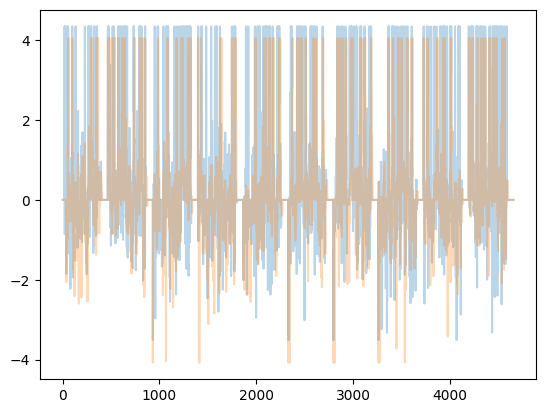

In [44]:
# (((df['close'].max()-df['close'])/df['close'].max())*50).plot(alpha=0.3)
df['fisher9'].plot(alpha=0.3)
df['fisher20'].plot(alpha=0.3)

In [45]:
df['fisher9'].describe()

count    4660.000000
mean        0.381790
std         1.358546
min        -3.507621
25%         0.000000
50%         0.000000
75%         0.495986
max         4.340741
Name: fisher9, dtype: float64

In [46]:
source = ColumnDataSource(data=dict(
    date=df['datetime'],
    idx=df.index,
    open=df["open"],
    high=df["high"],
    low=df["low"],
    close=df["close"]
))
fisher_source = ColumnDataSource(data=dict(
    # date=df['datetime'],
    idxs=[df.index for period in periods],
    fishers=[df[f'fisher{period}'] for period in periods],
    periods=[f'{period}' for period in periods],
    colors = [d3['Category10'][len(periods)][i] for i in range(len(periods))]
    # **{f'fisher{period}':df[f'fisher{period}'] for period in periods}
))
# Create a new figure
price_p = figure(#x_axis_type="datetime", 
            width=1500, height=450, 
            title="E-Mini Nasdaq 100",
            # x_range=DataRange1d(),
            background_fill_color="#3b3b3b",
            border_fill_color="white")
price_p.xaxis.major_label_orientation = pi/4
price_p.grid.grid_line_alpha=0.3

inc = df['close'] > df['open'] # green candels
dec = df['open'] > df['close'] # red candels
w = 1

# Render the candlestick chart
price_p.segment(x0='idx', y0='high', x1='idx', y1='low', color="white", source=source)
price_p.vbar(x=df.index[inc], top=df['open'][inc], bottom=df['close'][inc], width=w, fill_color="#76f522", line_color="white")
price_p.vbar(x=df.index[dec], top=df['open'][dec], bottom=df['close'][dec], width=w, fill_color="#F2583E", line_color="white")

# Format the y-axis tick labels
price_p.yaxis[0].formatter = NumeralTickFormatter(format="$0,000.00")
price_p.yaxis[0].axis_line_color = "white"
price_p.yaxis[0].major_tick_line_color = "white"
price_p.yaxis[0].minor_tick_line_color = "white"
# price_p.toolbar.active_scroll = p.select_one(WheelZoomTool)

# map dataframe indices to date strings and use as label overrides
price_p.xaxis.major_label_overrides = {
    i: date.strftime('%d') for i, date in enumerate(df["datetime"])
}
price_p.xaxis.bounds = (0, df['datetime'].values[-1])


# fisher rande excluding -inf and +inf
# fisher_min = df[df['fisher9']>df['fisher9'].min()]['fisher9'].min()
# fisher_max = df[df['fisher9']<df['fisher9'].max()]['fisher9'].max()

# Create a new figure for the Fisher Transform Indicator
fisher_p = figure(#x_axis_type="datetime",
                 width=1500, height=300, 
                 title=f"Fisher Transform ({period})",
                 x_range=price_p.x_range,
                 background_fill_color="#3b3b3b",
                 border_fill_color="white")

# Add a second y-axis for the Fisher Transform values
# p.extra_y_ranges = {"fisher": Range1d(start=fisher_min*2, end=fisher_max*2)}
# p.add_layout(LinearAxis(y_range_name="fisher", axis_label="Fisher Transform"), 'right')

# Render the Fisher Transform Indicator on the second y-axis
# p.plot(x='date', y='fisher', color="#FF9F1C", line_width=2, y_range_name="fisher", source=source)
# for i, period in enumerate(periods):
#    fisher_p.multi_line(x='idxs', y=f'fisher{period}', color=, line_width=2, source=fisher_source)
fisher_p.multi_line(xs='idxs', ys=f'fishers', color='colors', line_width=2, source=fisher_source)
# Add a second y-axis for the Fisher Transform values
# fisher_p.add_layout(LinearAxis(y_range_name="fisher", axis_label="Fisher Transform", axis_line_color="white", major_tick_line_color="white", minor_tick_line_color="white"), 'left')
fisher_p.add_tools(WheelZoomTool(dimensions="width"))

# hover_tool = HoverTool(tooltips=[("Fisher Transform", f"@fisher{period}") for i, period in enumerate(periods)], mode="vline")
hover_tool = HoverTool(show_arrow=False, line_policy='next',tooltips=[('', "$swatch:colors"),('period','@periods')])

fisher_p.add_tools(hover_tool)
# map dataframe indices to date strings and use as label overrides
fisher_p.xaxis.major_label_overrides = {
    i: date.strftime('%d') for i, date in enumerate(df["datetime"])
}
# fisher_p.xaxis.bounds = (0, df['datetime'].values[-1])


# Set the gridplot
grid = gridplot([[price_p], [fisher_p]])

# Show the plot
output_file("./chart.html")
show(grid)

In [153]:
output_file

In [54]:
r = c.search_instruments('.*NDX.*',client.Client.Instrument.Projection.SYMBOL_REGEX)
assert r.status_code == 200, r.raise_for_status()


In [34]:
r = c.search_instruments('.*NASDAQ.*',client.Client.Instrument.Projection.DESC_REGEX)
assert r.status_code == 200, r.raise_for_status()


In [55]:
o = r.json()

In [59]:
o

{'RNDXF': {'cusip': 'S6696M107',
  'symbol': 'RNDXF',
  'description': 'Randgold & Exploration Company, Limited Shs (PC)',
  'exchange': 'Pink Sheet',
  'assetType': 'EQUITY'},
 '$XNDXNNRAUDX': {'symbol': '$XNDXNNRAUDX',
  'description': 'Nasdaq-100 Notional Net Return Index AUD',
  'exchange': 'Indices',
  'assetType': 'INDEX'},
 '$OMRXBONDXMUNI13X': {'symbol': '$OMRXBONDXMUNI13X',
  'exchange': 'Indices',
  'assetType': 'INDEX'},
 '$GRNWINDX': {'symbol': '$GRNWINDX',
  'description': 'NDQ OMX WIND',
  'exchange': 'Indices',
  'assetType': 'INDEX'},
 '$NDXERNRHX': {'symbol': '$NDXERNRHX',
  'description': 'NASDAQ 100 CURRENCY HEDGED EUR NET TR',
  'exchange': 'Indices',
  'assetType': 'INDEX'},
 '$XNDXOSX': {'symbol': '$XNDXOSX',
  'description': 'NASDAQ-100 Total Return Opening Stlmt Value',
  'exchange': 'Indices',
  'assetType': 'INDEX'},
 '$ICANNDX.X': {'symbol': '$ICANNDX.X',
  'description': 'SSI Impact Index',
  'exchange': 'Indices',
  'assetType': 'INDEX'},
 '$XNDXS2X': {'sym

In [60]:
for k, v in o.items():
    if 'description' in v:
        if '100' in v['description'] and v['assetType'] == 'INDEX':
            print(v)
            # print(v['symbol'], v['description'])
    # break

{'symbol': '$XNDXNNRAUDX', 'description': 'Nasdaq-100 Notional Net Return Index AUD', 'exchange': 'Indices', 'assetType': 'INDEX'}
{'symbol': '$NDXERNRHX', 'description': 'NASDAQ 100 CURRENCY HEDGED EUR NET TR', 'exchange': 'Indices', 'assetType': 'INDEX'}
{'symbol': '$XNDXOSX', 'description': 'NASDAQ-100 Total Return Opening Stlmt Value', 'exchange': 'Indices', 'assetType': 'INDEX'}
{'symbol': '$XNDXS2X', 'description': 'NASDAQ-100 2x Short Total Return Index', 'exchange': 'Indices', 'assetType': 'INDEX'}
{'symbol': '$XNDXS3X', 'description': 'NASDAQ-100 3X INVERSE TOTAL RETURN INDEX', 'exchange': 'Indices', 'assetType': 'INDEX'}
{'symbol': '$XNDXS1X', 'description': 'NASDAQ-100 1x Short Total Return Index', 'exchange': 'Indices', 'assetType': 'INDEX'}
{'symbol': '$NDXEAUDX', 'description': 'NASDAQ-100 Equal Weighted AUD Index', 'exchange': 'Indices', 'assetType': 'INDEX'}
{'symbol': '$NDXESGTX', 'description': 'Nasdaq-100 ESG Total Return Index', 'exchange': 'Indices', 'assetType': '

In [16]:
r.raise_for_status()